# Colab Setup

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
%cd gdrive/"My Drive"/DKT

/content/gdrive/My Drive/DKT


In [4]:
%load_ext autoreload
%autoreload 2

In [ ]:
# Only run this if you don't have the repository cloned!
# !git clone https://github.com/nicolagp/learner-performance-prediction.git

In [5]:
# IMPORTANT: You need to have the repository cloned in order for the following steps to work!

%cd learner-performance-prediction/

/content/gdrive/My Drive/DKT/learner-performance-prediction


In [10]:
#!git reset --hard
!git pull

Checking out files: 100% (100/100), done.
HEAD is now at bf384d5 Fixed naming issue
Updating bf384d5..8064aa9
Fast-forward
 knowledge_dependencies/InfluenceGraph.py           |  34 +-
 .../Knowledge Dependencies.ipynb                   | 473 ---------------------
 knowledge_dependencies/influence.ipynb             | 406 ------------------
 knowledge_dependencies/pairs.py                    |  81 ----
 knowledge_dependencies/recommender.ipynb           | 203 ---------
 knowledge_dependencies/skill_ids.ipynb             | 220 ----------
 knowledge_dependencies/skill_influences.pkl        | Bin 7360 -> 0 bytes
 knowledge_dependencies/test.jpg                    | Bin 487822 -> 0 bytes
 8 files changed, 17 insertions(+), 1400 deletions(-)
 delete mode 100644 knowledge_dependencies/Knowledge Dependencies.ipynb
 delete mode 100644 knowledge_dependencies/influence.ipynb
 delete mode 100644 knowledge_dependencies/pairs.py
 delete mode 100644 knowledge_dependencies/recommender.ipynb
 delete mod

# Training the DKT Model

## Data Preprocessing

### Format and directory structure
The DKT model expects a particular file format and directory hierarchy. All datasets are located under the `data` folder. A dataset is a folder with 3 files in it:
- preprocessed_data.csv
- preprocessed_data_train.csv
- preprocessed_data_test.csv

Where `preprocessed_data.csv` is basically the rows of `preprocessed_data_train.csv` followed by the rows of `preprocessed_data_test.csv`.

Example of expected format (tab separated):
```
user_id	item_id	timestamp	correct	skill_id
0	1429	0	0	11
0	1402	0	0	12
0	1433	0	1	3
0	1415	0	0	24
0	1435	0	0	10
...
```

### Converting from "microdados" to DKT format
For this task, there is a script called `preprocessing.py`. The paths to load the enem data and to save the results are hardcoded and need to be changed. In addition, it is currently set up to load 2015, 2017 and 2018 -- If other years are needed, the script will have to be adjusted. The script is well documented and should be easy to modify.

## Running the model

Once the data is properly processed, according to the steps above, training the model should be as easy as running the following command on the top level directory:

```
python train_dkt2.py --dataset <dataset name>
```

After the model is done training, DKT scores will be assigned as a second column in `preprocessed_data_test.csv`

Note: tensorboardX is required to train the model

Note 2: the model runs on pytorch and requires a GPU to run. It is possible to alter the original model to accept CPU utilization; that would require a careful inspection of what tensor variables are allocated and make the `.cuda()` calls according to GPU availability (using `torch.cuda.is_available()`)

Note 3: Colab won't have GPU enabled by default so you might need to manually enable it. To do so go to Edit -> Notebook Settings -> Hardware Accelerator = GPU



In [7]:
!pip install tensorboardX

     |████████████████████████████████| 204kB 3.5MB/s 


In [8]:
!python train_dkt2.py --dataset "2015_CN_AZUL"

Step 20, {'loss/train': 0.6068923205137253, 'auc/train': 0.6789298676431719}
Step 40, {'loss/train': 0.5890672534704209, 'auc/train': 0.700687172017639}
Step 60, {'loss/train': 0.5819037735462189, 'auc/train': 0.7120480364177899}
Step 80, {'loss/train': 0.5796580016613007, 'auc/train': 0.7151882354216016}
Step 100, {'loss/train': 0.5802239060401917, 'auc/train': 0.7144369710234867}
Step 120, {'loss/train': 0.5806314557790756, 'auc/train': 0.7160226250582377}
Step 140, {'loss/train': 0.5773126363754273, 'auc/train': 0.7194651710539468}
Step 155, {'loss/train': 0.5793905099232991, 'auc/train': 0.7181407385657648, 'auc/val': 0.7256553966891955}
Step 160, {'loss/train': 0.5797898888587951, 'auc/train': 0.7152155162393201}
Step 180, {'loss/train': 0.5753940463066101, 'auc/train': 0.7220425554988512}
Step 200, {'loss/train': 0.5784666866064072, 'auc/train': 0.721539826364575}
Step 220, {'loss/train': 0.5770835101604461, 'auc/train': 0.7202879400189719}
Step 240, {'loss/train': 0.575269603729

# Knowledge Dependencies


## Influence Matrix


In [11]:
from knowledge_dependencies.InfluenceMatrix import InfluenceMatrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
# path to the data used by the DKT model
data_path = "data/2015_CN_AZUL/preprocessed_data_test.csv"
# path to a saved model
model_path = "save/dkt/2015_CN_AZUL"
# object to handle all logic of computing pairs and generating/plotting the matrices
im = InfluenceMatrix(data_path, model_path)

In [13]:
# compute dependency matrices
items = im.get_item_matrix()
skills = im.get_skill_matrix(items)

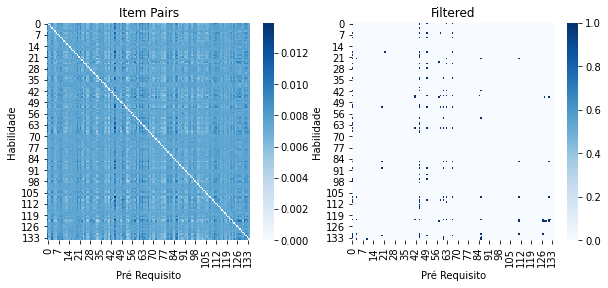

In [14]:
# Provide threshold for filtered plot and matrix with item relations
im.plot_items(0.01, items)

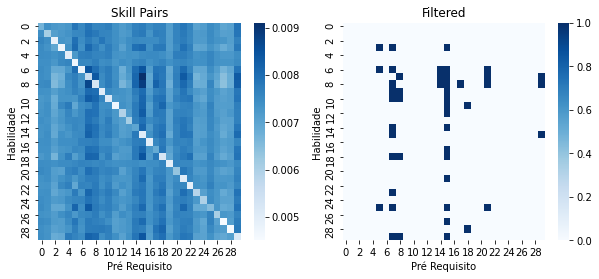

In [15]:
# Provide threshold for filtered plot and matrix with skill relations
im.plot_skills(0.008, skills)

## Influence Graph

### Visualizing Skill Relations

In [16]:
from knowledge_dependencies.InfluenceGraph import InfluenceGraph
# create graph from filtered skills matrix
filtered = skills > 0.008
ig = InfluenceGraph(filtered)

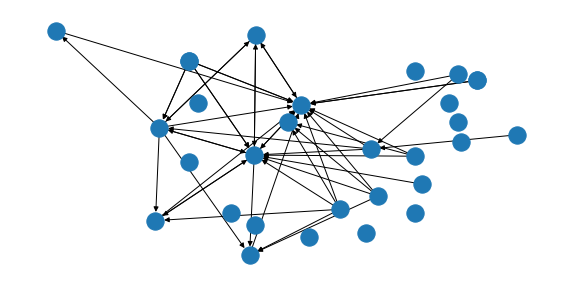

In [17]:
ig.plot_graph(tidy=True)

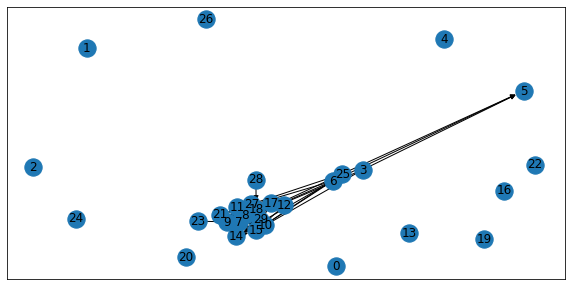

In [18]:
ig.plot_graph(tidy=False)

### Removing Cycles
It is interesting to remove cycles before analyzing the relationships between skills. To do so, the following library can be used:

https://github.com/zhenv5/breaking_cycles_in_noisy_hierarchies

**Important:** this library only works with python 2.7, so you need to run it on an environment that runs on that version and has networkx installed.

### Usage
Once you have the repository cloned and the right environment setup, you can save an edges file from an adjacency matrix and remove its cycles. The `.edges` can be saved like this:

```
skills = InfluenceMatrix.get_skill_matrix()
ig = InfluenceGraph(adj_matrix=skills)
ig.save_edges(<path to save to>)
```

Next, you can pass the generated file to the following command and generate another `.edges` file with no cycles:

```
python remove_cycle_edges_by_minimum_feedback_arc_set_greedy.py -g <filename>
```

The result of this command is a file in the format: `<filename>_removed_by_mfas.edges`

Finally, you can load that file on an `Influence Graph` object, by passing the filepath:

```
ig = InfluenceGraph(path=<path>)
```